<a href="https://colab.research.google.com/github/Atharva-Garud/DEC_Lab/blob/main/PD25_DEC_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression**

Slope: 0.7999999999999999
Intercept: 0.3999999999999999


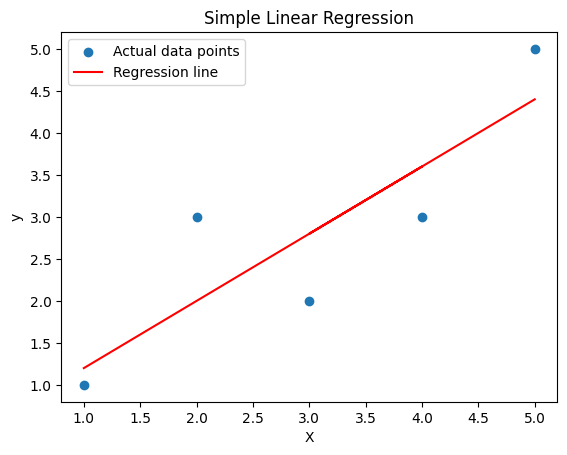

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
df = pd.DataFrame(data, columns=['x', 'y'])

X = df[['x']]
y = df['y']


model = LinearRegression()

model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

y_pred = model.predict(X)

plt.scatter(X, y, label='Actual data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()



---



**Splitting the data into Train and Test**

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
df = pd.DataFrame(data, columns=['x', 'y'])

X = df[['x']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:")
print(pd.concat([X_train, y_train], axis=1))

print("\nTesting Set:")
print(pd.concat([X_test, y_test], axis=1))

Training Set:
   x  y
4  5  5
2  4  3
0  1  1
3  3  2

Testing Set:
   x  y
1  2  3




---



**Root Mean Squared Error**

In [31]:
import numpy as np
import pandas as pd

def calculate_rmse(df, true_col, pred_col):

    y_true = df[true_col]
    y_pred = df[pred_col]

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays must have the same length.")

    squared_diff = (y_true - y_pred) ** 2

    mse = np.mean(squared_diff)

    rmse = np.sqrt(mse)

    print(f'mse: {mse}')

    return rmse

rmse = calculate_rmse(df, 'x', 'y')
print("Root Mean Squared Error:", rmse)

mse: 0.6
Root Mean Squared Error: 0.7745966692414834




---



**Evaluate regression alsorithm**

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def evaluate_regression_algorithm(data, features_col, target_col, test_size=0.2, random_state=42):

    X = data[features_col]
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)

    r2 = r2_score(y_train, y_pred_train)

    print(f'R-squared (R2): {r2}')

    return r2

data = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
df = pd.DataFrame(data, columns=['x', 'y'])
rmse = calculate_rmse(df, 'x', 'y')
print("Root Mean Squared Error:", rmse)
evaluate_regression_algorithm(df, features_col=['x'], target_col='y')

mse: 0.6
Root Mean Squared Error: 0.7745966692414834
R-squared (R2): 0.8889795918367348


0.8889795918367348



---



**Mean**

In [47]:
def calculate_mean(data):

    means = {}

    for col in data.columns:
        column_data = data[col].tolist()

        mean = sum(column_data) / len(column_data)
        means[col] = mean

    return means

means = calculate_mean(df)
print("Means:", means)

Means: {'x': 3.0, 'y': 2.8}




---



**Variances**

In [46]:
def calculate_variance(data):


    variances = {}

    for col in data.columns:
        column_data = data[col].tolist()

        if len(column_data) < 2:
            raise ValueError(f"Column '{col}' should have at least two elements to calculate variance.")

        mean = sum(column_data) / len(column_data)
        sum_squared_diff = sum((x - mean) ** 2 for x in column_data)
        variance = sum_squared_diff / (len(column_data))

        variances[col] = variance

    return variances

variances = calculate_variance(df)
print("Variances:", variances)

Variances: {'x': 2.0, 'y': 1.7600000000000002}




---



**Covariance between x and y**

In [48]:
def calculate_covariance(data, x_col, y_col):

    # Check if the input DataFrame is empty
    if data.empty:
        raise ValueError("Input DataFrame is empty.")

    x_data = data[x_col].tolist()
    y_data = data[y_col].tolist()

    mean_x = sum(x_data) / len(x_data)
    mean_y = sum(y_data) / len(y_data)

    covariance = sum((x - mean_x) * (y - mean_y) for x, y in zip(x_data, y_data)) / (len(x_data))

    return covariance

covariance_xy = calculate_covariance(df, 'x', 'y')
print("Covariance between x and y:", covariance_xy)

Covariance between x and y: 1.6




---



**Coefficients(B0, B1)**

In [49]:
def calculate_regression_coefficients(data, x_col, y_col):

    x_data = data[x_col].tolist()
    y_data = data[y_col].tolist()

    mean_x = sum(x_data) / len(x_data)
    mean_y = sum(y_data) / len(y_data)

    numerator = sum((x - mean_x) * (y - mean_y) for x, y in zip(x_data, y_data))
    denominator = sum((x - mean_x) ** 2 for x in x_data)

    B1 = numerator / denominator
    B0 = mean_y - B1 * mean_x

    return B0, B1

B0, B1 = calculate_regression_coefficients(df, 'x', 'y')
print("Intercept (B0):", B0)
print("Slope (B1):", B1)

Intercept (B0): 0.39999999999999947
Slope (B1): 0.8
